In [23]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
train = pd.read_csv('train/train.csv')
item_data = pd.read_csv('train/item_data.csv')
camp_data = pd.read_csv('train/campaign_data.csv')
cust_demo = pd.read_csv('train/customer_demographics.csv')
cust_trans = pd.read_csv('train/customer_transaction_data.csv')
item_map = pd.read_csv('train/coupon_item_mapping.csv')

# Visualising Campaign Data

In [4]:
camp_data.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [5]:
pd.crosstab(camp_data['campaign_id'], camp_data['campaign_type'])

campaign_type,X,Y
campaign_id,,
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,0,1


In [6]:
camp_data[['campaign_id', 'campaign_type']].groupby(['campaign_type']).count()

,campaign_id
campaign_type,
X,6
Y,22


# Visualising Item Data

In [9]:
item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [10]:
item_data[['item_id', 'category']].groupby(['category']).count()

,item_id
category,
Alcohol,303
Bakery,1679
"Dairy, Juices & Snacks",2425
Flowers & Plants,664
Fuel,14
Garden,102
Grocery,32448
Meat,2080
Miscellaneous,385


In [14]:
(item_data['brand_type'].unique())

array(['Established', 'Local'], dtype=object)

In [39]:
def func(a):
    return np.log(len(a))

The below plot indicates log(count) of individual item categories alongwith information regarding the brand_type

c:\programs files\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


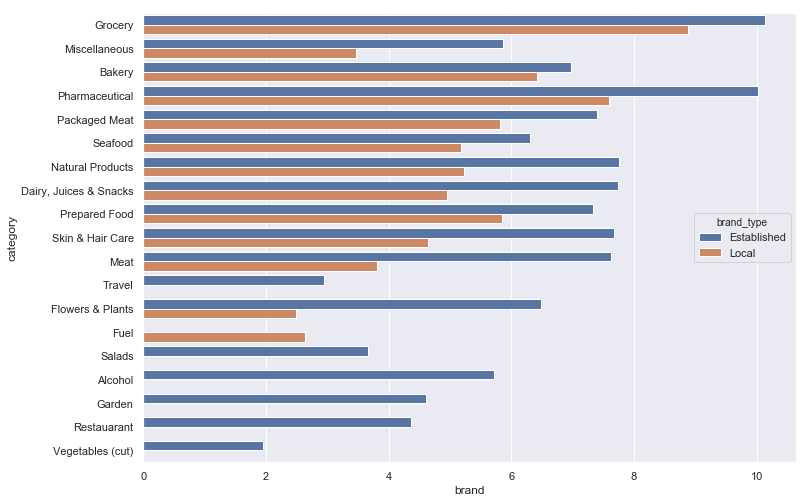

In [40]:
sns.barplot(x="brand", y="category", data=item_data, hue="brand_type", estimator=func)

In [41]:
np.log(item_data[['brand', 'category']].groupby(['category']).count())

,brand
category,
Alcohol,5.713733
Bakery,7.425954
"Dairy, Juices & Snacks",7.793587
Flowers & Plants,6.498282
Fuel,2.639057
Garden,4.624973
Grocery,10.387394
Meat,7.640123
Miscellaneous,5.953243


# Visualising Customer Transactions

In [47]:
cust_trans.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [48]:
cust_trans.describe()

,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
count,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06
mean,8.040020e+02,2.951903e+04,1.306633e+02,1.146036e+02,-1.776871e+01,-5.948983e-01
std,4.573363e+02,1.790806e+04,1.311545e+03,1.529053e+02,3.788867e+01,7.069367e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,3.600000e-01,-3.120310e+03,-1.992230e+03
25%,4.180000e+02,1.468400e+04,1.000000e+00,4.916000e+01,-2.315000e+01,0.000000e+00
50%,8.010000e+02,2.659700e+04,1.000000e+00,7.801000e+01,-1.780000e+00,0.000000e+00
75%,1.198000e+03,4.240575e+04,1.000000e+00,1.243100e+02,0.000000e+00,0.000000e+00
max,1.582000e+03,7.406600e+04,8.963800e+04,1.780964e+04,0.000000e+00,0.000000e+00


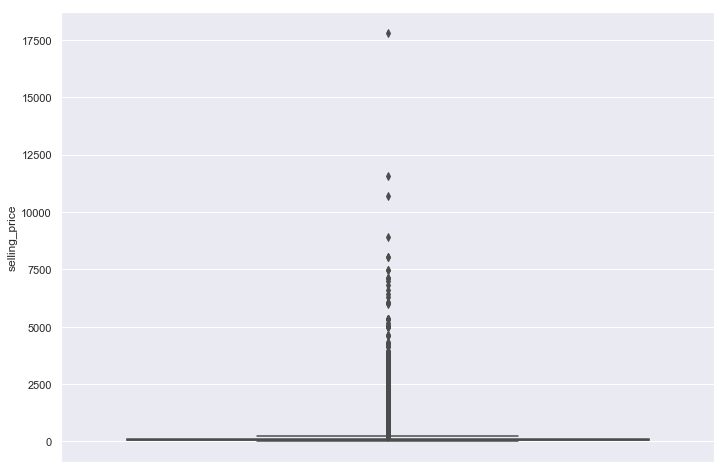

In [54]:
sns.boxplot(x="selling_price", data=cust_trans, orient='v')

c:\programs files\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


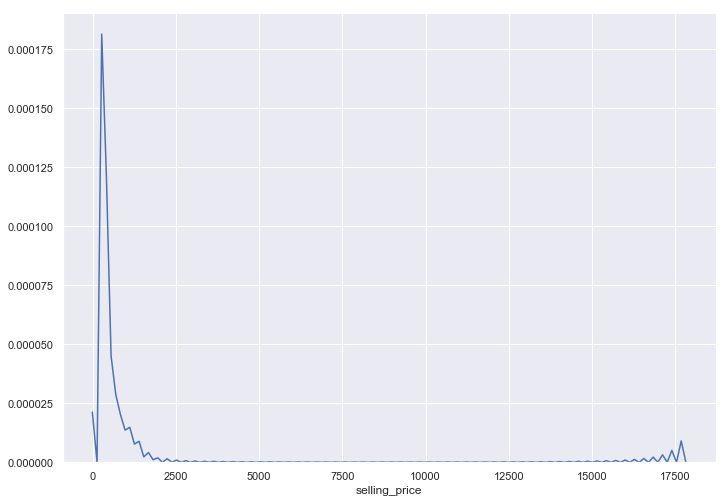

In [56]:
sns.distplot(cust_trans['selling_price'], hist=False)

Applying Box-Cox

In [58]:
from scipy.stats import boxcox

In [68]:
a,_ = boxcox(cust_trans['selling_price'])

c:\programs files\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


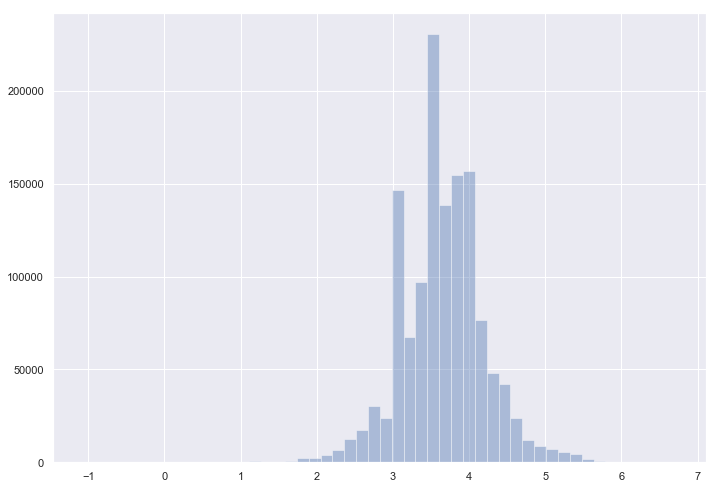

In [76]:
sns.distplot(a, kde=False)

In [77]:
cust_trans['boxcox_sp'] = a

In [78]:
cust_trans.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,boxcox_sp
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,3.088625
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,3.393530
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,3.877129
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,3.558606
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,3.598561


c:\programs files\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


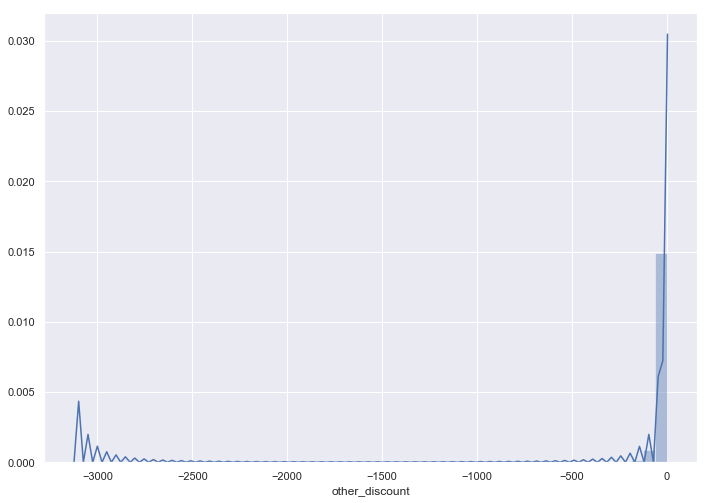

In [79]:
sns.distplot(cust_trans['other_discount'])

Transforming other discount to positive for ease of calculation

In [91]:
b = ((cust_trans['other_discount'])*-1)+0.001

c:\programs files\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


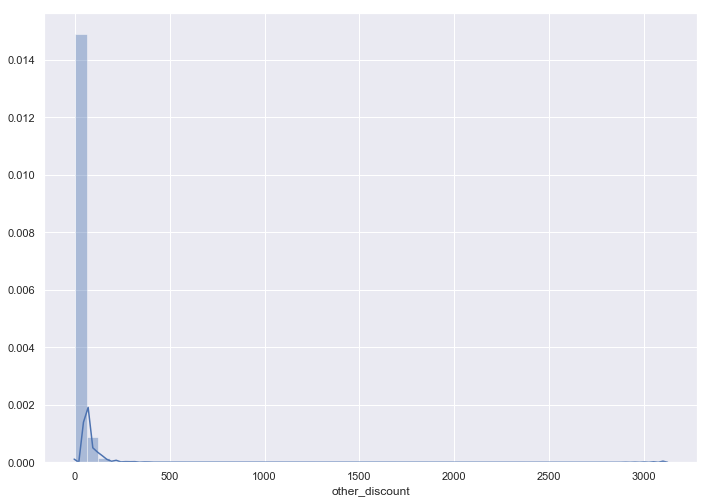

In [92]:
sns.distplot(b)

Applying boxcox

c:\programs files\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


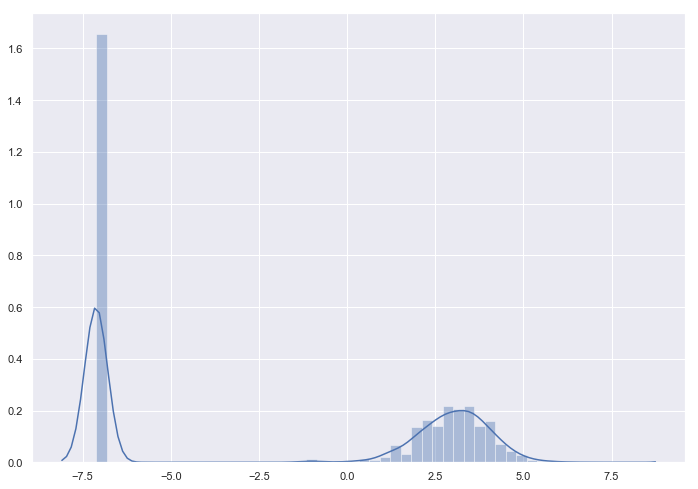

In [95]:
sns.distplot(boxcox(b)[0])

c:\programs files\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


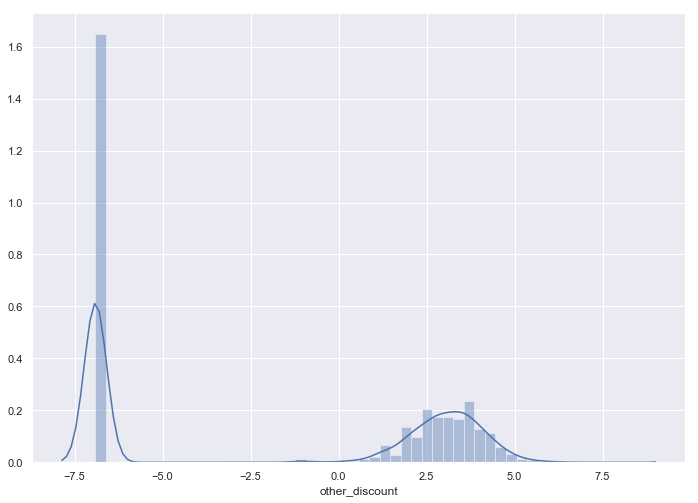

In [96]:
sns.distplot(np.log(b))

The other_discount feature is unable to transform and convert to normal 

In [97]:
cust_trans.describe()

,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,boxcox_sp
count,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06,1.324566e+06
mean,8.040020e+02,2.951903e+04,1.306633e+02,1.146036e+02,-1.776871e+01,-5.948983e-01,3.665866e+00
std,4.573363e+02,1.790806e+04,1.311545e+03,1.529053e+02,3.788867e+01,7.069367e+00,5.456358e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,3.600000e-01,-3.120310e+03,-1.992230e+03,-1.065760e+00
25%,4.180000e+02,1.468400e+04,1.000000e+00,4.916000e+01,-2.315000e+01,0.000000e+00,3.333258e+00
50%,8.010000e+02,2.659700e+04,1.000000e+00,7.801000e+01,-1.780000e+00,0.000000e+00,3.662262e+00
75%,1.198000e+03,4.240575e+04,1.000000e+00,1.243100e+02,0.000000e+00,0.000000e+00,3.981832e+00
max,1.582000e+03,7.406600e+04,8.963800e+04,1.780964e+04,0.000000e+00,0.000000e+00,6.724745e+00


In [98]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [99]:
cust_trans.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,boxcox_sp
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,3.088625
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,3.393530
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,3.877129
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,3.558606
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,3.598561


# Linking Transaction to training data 

In [104]:
item_map[item_map['coupon_id']==27].head()

,coupon_id,item_id
39196,27,24775
39197,27,14958
39198,27,40431
39199,27,20749
39200,27,56860


In [105]:
cust_trans[cust_trans['customer_id']==1053][['item_id']].merge(item_map[item_map['coupon_id']==27], on="item_id")

,item_id,coupon_id


In [109]:
a = cust_trans[cust_trans['customer_id']==1053]['item_id'].tolist()

In [115]:
b = item_map[item_map['coupon_id']==27]['item_id'].tolist()

In [117]:
set(a).intersection(set(b))

set()

In [125]:
train[train['customer_id']==1053]

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1465,2444,13,513,1053,0
2198,3651,13,166,1053,0
4620,7712,13,766,1053,0
9277,15317,13,165,1053,0
11720,19329,13,155,1053,0
13128,21689,13,23,1053,0
13185,21778,13,143,1053,0
13652,22524,13,25,1053,0
15627,25771,13,124,1053,0


In [136]:
a = set(item_map[item_map['coupon_id']==166]['item_id'].tolist())

In [137]:
b = set(cust_trans[cust_trans['customer_id']==1053]['item_id'].tolist())

In [138]:
a.intersection(b)

set()

In [153]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [200]:
item_map[item_map['coupon_id']==27]

,coupon_id,item_id
39196,27,24775
39197,27,14958
39198,27,40431
39199,27,20749
39200,27,56860
39201,27,58066
39202,27,56921
39203,27,56955
39204,27,58068
39205,27,56907


In [203]:
cust_trans[(cust_trans['customer_id']==1053)][['item_id']].merge(item_map[item_map['coupon_id']==27][['item_id']], on="item_id")

,item_id


In [198]:
set(a).intersection(set(b))

set()

In [188]:
len(set(train['coupon_id'].tolist()).intersection(set(item_map['coupon_id'].tolist())))

866

In [204]:
len(set(train['coupon_id'].tolist()))

866

In [205]:
len(set(item_map['coupon_id'].tolist()))

1116

In [192]:
len(set(cust_trans['item_id'].tolist()))

74063

In [193]:
len(set(item_map['item_id'].tolist()))

36289

In [195]:
len(set(item_map['item_id'].tolist()).intersection(set(cust_trans['item_id'].tolist())))

36286

In [224]:
train.tail()

,id,campaign_id,coupon_id,customer_id,redemption_status
78364,128587,8,71,1523,0
78365,128589,30,547,937,0
78366,128590,8,754,1004,0
78367,128592,13,134,71,0
78368,128595,13,681,623,0


In [226]:
cust_trans[cust_trans['customer_id']==1523].head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,boxcox_sp
20883,2012-02-11,1523,13819,1,32.06,0.00,0.0,3.017352
20884,2012-02-11,1523,14637,1,71.24,-6.77,0.0,3.598561
20885,2012-02-11,1523,25927,1,35.26,0.00,0.0,3.088625
20886,2012-02-11,1523,26807,1,38.47,0.00,0.0,3.153410
20887,2012-02-11,1523,47178,1,88.69,0.00,0.0,3.751489


In [228]:
item_map[item_map['item_id']==14637]

,coupon_id,item_id


In [231]:
ck = set(train[train['redemption_status']==1]['coupon_id'].tolist())

239

In [239]:
for i in ck:
    a = item_map[item_map['coupon_id']==i]['item_id'].tolist()
    if len(a)==0:
        print(i)

So this proves that all missing items do not have positive redemption status, because not all items have coupons and vice-versa